# k-Nearest Neighbors

K-nearest neighbors (KNN) is a type of supervised learning algorithm which is used for both regression and classification purposes, but mostly it is used for the later. Given a dataset with different classes, KNN tries to predict the correct class of test data by calculating the distance between the test data and all the training points. It then selects the k points which are closest to the test data.  Once the points are selected, the algorithm calculates the probability (in case of classification) of the test point belonging to the classes of the k training points and the class with the highest probability is selected. In the case of a regression problem, the predicted value is the mean of the k selected training points.


Let’s understand this with an illustration:


1)	Given a training dataset as given below. We have a new test data that we need to assign to one of the two classes.

<img src="1.png" width="">
                                      

2)	Now, the k-NN algorithm calculates the distance between the test data and the given training data.

<img src="2.png" width="">

                                                        
3)	After calculating the distance, it will select the k training points which are nearest to the test data. Let’s assume the value of k is 3 for our example.

<img src="3.png" width="">                                            


4)	Now, 3 nearest neighbors are selected, as shown in the figure above. Let’s see in which class our test data will be assigned :

Number of Green class values = 2
Number of Red class values = 1
Probability(Green) = 2/3
Probability(Red) = 1/3

Since the probability for Green class is higher than Red, the k-NN algorithm will assign the test data to the Green class.

Similarly, if this were the case of a regression problem, the predicted value for the test data will simply be the mean of all the 3 nearest values.

This is the basic working algorithm for k-NN. Let’s understand how the distance is calculated :

### Euclidean Distance: 

It is the most commonly used method to calculate the distance between two points.
The Euclidean distance between two points ‘p(p1,p2)’ and ‘q(q1,q2)’ is calculated  as :

<img src="4.png" width="">       image source : Wikipedia

<img src="5.png" width="">

                                          
Similarly,for n-dimensional space, the Euclidean distance is given as :

<img src="6.png" width="">
 


### Lazy Learners

k-NN algorithms are often termed as Lazy learners. Let’s understand why is that. Most of the algorithms like Bayesian classification, logistic regression, SVM etc., are called Eager learners. These algorithms generalize over the training set before receiving the test data i.e. they create a model based on the training data before receiving the test data and then do the prediction/classification on the test data.
But this is not the case with the k-NN algorithm. It doesn’t create a generalized model for the training set but waits for the test data. Once test data is provided then only it starts generalizing the training data to classify the test data.  So, a lazy learner just stores the training data and waits for the test set. Such algorithms work less while training and more while classifying a given test dataset.



### Pros and Cons of k-NN Algorithm

Pros:
*	It can be used for both regression and classification problems.
*	It is very simple and easy to implement.
*	Mathematics behind the algorithm is easy to understand.
*	There is no need to create model or do hyperparameter tuning.
*   KNN doesn't make any assumption for the distribution of the given data.
*   There is not much time cost in training phase.

Cons:
*	Finding the optimum value of ‘k’
*	It takes a lot of time to compute the distance between each test sample and all training samples.
*	Since the model is not saved beforehand in this algorithm (lazy learner), so every time one predicts a test value, it follows the same steps again and again. 
*	Since, we need to store the whole training set for every test set, it requires a lot of space.
*	It is not suitable for high dimensional data.
*   Expensive in testing phase


### Different ways to perform k-NN

Above we studied the way k-NN classifies the data by calculating the distance of test data from each of the observations and selecting ‘k’ values. This approach is also known as “Brute Force k-NN”.  This is computionally very expensive. So, there are other ways as well to perfrom k-NN which are comparatively less expensive than Brute force approach. The idea behind using other algorithms for k-NN classifier is to reduce the time during test period by preprocessing the training data in such a way that the test data can be easily classified in the appropriate clusters.


Let’s discuss and understand the two most famous algorithms:

#### k-Dimensional Tree (kd tree)

k-d tree is a hierarchical binary tree. When this algorithm is used for k-NN classficaition, it rearranges the whole dataset in a binary tree structure, so that when test data is provided, it would give out the result by traversing through the tree, which takes less time than brute search.

 
The dataset is divided like a tree as shown in the above figure. Say we have 3 dimensional data i.e. (x,y,z) then the tree is formed with root node being one of the dimensions, here we start with ‘x’. Then on the next level the split is done on basis of the second dimension, ‘y’ in our case. Similarly, third level with 3rd dimension and so on.  And in case of ‘k’ dimensions, each split is made on basis of ‘k’ dimensions. 
Let’s understand how k-d trees are formed with an example:

<img src="11.png" width=""> 

<img src="12.png" width=""> 

<img src="13.png" width=""> 

<img src="14.png" width=""> 
 
 

Once the tree is formed , it is easy for algorithm to search for the probable nearest neighbor just by traversing the tree.  The main problem k-d trees is that it gives probable nearest neighbors but can miss out actual nearest neighbors.


## Python  Implementation

<img src="image.jpg" width="">

In [1]:
#Import necessory libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 

import warnings
warnings.filterwarnings('ignore')

C:\Users\Shankar\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Shankar\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Shankar\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [74]:
# Get the CSV data here and print head
df = pd.read_csv('breast cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [75]:
#print summary
print ('Shape        ------>', df.shape)
print ('Each Column and data type and its count','\n')
print ( df.info())

Shape        ------> (569, 32)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64


In [76]:
#DROP ALERT 1 : Unnamed:32 column has all nulls. Safe to remove the column.
df = df.drop(['Unnamed: 32'],axis=1)

In [77]:
# Dataframe statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Seems no other cols have nulls. It's safe to proceed.

In [78]:
# Validate each class to understand if the dataset is imbalanced.

print ('Total Belign Tumor (B)    :  {} and its percentage is {} %'.format(df.diagnosis.value_counts()[0], round(df.diagnosis.value_counts()[0]/df.diagnosis.value_counts().sum()*100,2)) )
print ('Total Malignant Tumor (M) :  {} and its percentage is {} %'.format(df.diagnosis.value_counts()[1], round(df.diagnosis.value_counts()[1]/df.diagnosis.value_counts().sum()*100,2)) )


Total Belign Tumor (B)    :  357 and its percentage is 62.74 %
Total Malignant Tumor (M) :  212 and its percentage is 37.26 %


Dataset is not imbalanced, we are good to proceed.

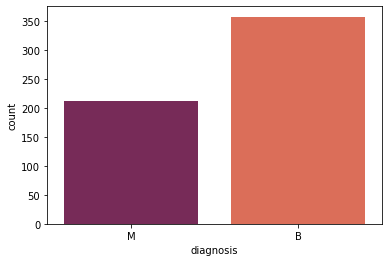

In [79]:
#Plot each class freequency
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df,palette='rocket')

In [80]:
df.shape

(569, 31)

# Using SelectKBest feature Selection method

####  SelectKBest use f_classif function to find best features, where f_classif uses ANOVA test.

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

In [82]:
#Replace Label column (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [83]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [121]:
best_features = SelectKBest(score_func=f_classif, k=17)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(17,'Score'))  # print 17 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(17,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

            Feature_Name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


# Model Building

In [122]:
new_X = df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]

In [123]:
new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [124]:
# Buidling model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(new_X,y,test_size = 0.25, random_state= 355)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [125]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[88,  5],
       [ 7, 43]], dtype=int64)

In [126]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        93
           1       0.90      0.86      0.88        50

    accuracy                           0.92       143
   macro avg       0.91      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



### Let's Use GridSearchCV for the best parameter to improve the accuracy

In [127]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = { 'algorithm' : ['kd_tree', 'brute'],
               'leaf_size' : [15,18,20],
               'n_neighbors' : [3,5,7,13]
              }

In [148]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [149]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=3, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=3, score=0.941, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=3, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=3, score=0.941, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, le

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=13, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=13, score=0.976, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.941, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.941, total=   0.0s
[CV] 

[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, score=0.894, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, score=0.976, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.941, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.906, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=bru

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.1s finished


GridSearchCV(estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=17,
                                            n_neighbors=13),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]},
             verbose=3)

In [150]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [151]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size =15, n_neighbors =13)

In [152]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=13)

In [153]:
y_pred = knn.predict(x_test)

In [154]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[90,  3],
       [ 9, 41]], dtype=int64)

In [155]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        93
           1       0.93      0.82      0.87        50

    accuracy                           0.92       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.92      0.92      0.91       143

